In [ ]:
# import library

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

In [ ]:
# import data set

df = pd.read_csv('/content/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# drop id, kolom yang tidak digunakan

df.drop(columns=['Id'], axis=1, inplace=True)

In [ ]:
df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


79 kolom variabel dependen \
1 kolom variabel independen

In [ ]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1259.000000,1041.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1252.000000,1259.000000,1259.000000,...,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,56.914218,70.110471,10524.300238,6.103257,5.570294,1971.478157,1984.816521,103.133387,443.334392,45.725973,...,94.604448,46.150913,21.625099,3.482129,14.668785,1.819698,45.944400,6.315330,2007.799841,181144.812550
std,42.353617,23.522213,10391.598333,1.381394,1.119465,29.933659,20.617506,182.185126,439.025793,159.593598,...,123.939261,65.449317,60.920712,29.289552,54.093490,32.364185,525.688744,2.684202,1.324095,80588.024473
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7590.000000,5.000000,5.000000,1954.000000,1966.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,70.000000,9452.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,385.000000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163500.000000
75%,70.000000,80.000000,11611.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.000000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213750.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1474.000000,...,857.000000,523.000000,552.000000,508.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1259 non-null   int64  
 1   MSZoning       1259 non-null   object 
 2   LotFrontage    1041 non-null   float64
 3   LotArea        1259 non-null   int64  
 4   Street         1259 non-null   object 
 5   Alley          76 non-null     object 
 6   LotShape       1259 non-null   object 
 7   LandContour    1259 non-null   object 
 8   Utilities      1259 non-null   object 
 9   LotConfig      1259 non-null   object 
 10  LandSlope      1259 non-null   object 
 11  Neighborhood   1259 non-null   object 
 12  Condition1     1259 non-null   object 
 13  Condition2     1259 non-null   object 
 14  BldgType       1259 non-null   object 
 15  HouseStyle     1259 non-null   object 
 16  OverallQual    1259 non-null   int64  
 17  OverallCond    1259 non-null   int64  
 18  YearBuil

In [ ]:
# membuat variabel baru untuk membedakan variabel numerikal dan kategorikal dalam df

numerical_feats = df.dtypes[df.dtypes != 'object'].index
print('Jumlah numerical features adalah : ', len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == 'object'].index
print('Jumlah categorical features adalah : ', len(categorical_feats))

Jumlah numerical features adalah :  37
Jumlah categorical features adalah :  43


In [ ]:
# menampilkan nama kolom yang ada pada variabel numerical dan categorical 

print('numerical_feats = ', df[numerical_feats].columns)
print('*'*100)
print('categorical_feats = ', df[categorical_feats].columns)


numerical_feats =  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
****************************************************************************************************
categorical_feats =  Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Ex

In [ ]:
# melihat jumlah missing values dari tiap kolom

total_miss = df.isnull().sum().sort_values(ascending=False)
percent_miss = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Total', 'Percent'])

missing_data.head(20)

,Total,Percent
PoolQC,1255,99.682288
MiscFeature,1208,95.949166
Alley,1183,93.963463
Fence,1019,80.937252
FireplaceQu,599,47.577442
LotFrontage,218,17.315330
GarageCond,71,5.639396
GarageQual,71,5.639396
GarageType,71,5.639396
GarageFinish,71,5.639396


In [ ]:
# mengganti keterangan NaN menjadi None (NaN bukan berarti null, tapi ada valuenya)

cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType','Electrical',
               'KitchenQual','SaleType','Functional','Exterior2nd','Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning','Utilities']

for i in cols_fillna:
  df[i] = df[i].fillna('None')

In [ ]:
# cek kembali kolom yang sudah diubah menjadi none

total_miss = df.isnull().sum().sort_values(ascending=False)
percent_miss = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Total', 'Percent'])

missing_data.head(20)

,Total,Percent
LotFrontage,218,17.315330
GarageYrBlt,71,5.639396
MasVnrArea,7,0.555997
MSSubClass,0,0.000000
KitchenAbvGr,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000
TotRmsAbvGrd,0,0.000000


Masih terdapat missing values pada 3 kolom LotFrontage, GarageYrBlt, dan MasVnrArea

In [ ]:
df[['LotFrontage','GarageYrBlt','MasVnrArea']].describe()

,LotFrontage,GarageYrBlt,MasVnrArea
count,1041.000000,1188.000000,1252.000000
mean,70.110471,1978.430135,103.133387
std,23.522213,24.718827,182.185126
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,70.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
max,313.000000,2010.000000,1600.000000


* Dari keterangan diatas menunjukkan LotFrontage dan GarageYrBlt tidak banyak pencilan, jadi cukup diisi dengan mean
* Sedangkan untuk kolom MasVnrArea, data yang terbaca null sebenarnya memang memiliki nilai 0, jadi perlu untuk mengganti dengan value 0

In [ ]:
df[['LotFrontage','GarageYrBlt']] = df[['LotFrontage','GarageYrBlt']].fillna(df[['LotFrontage','GarageYrBlt']].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].min())

In [ ]:
# cek kembali kolom missing values yang sudah diisi 

total_miss = df.isnull().sum().sort_values(ascending=False)
percent_miss = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Total', 'Percent'])

missing_data.head(20)

,Total,Percent
MSSubClass,0,0.0
MSZoning,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


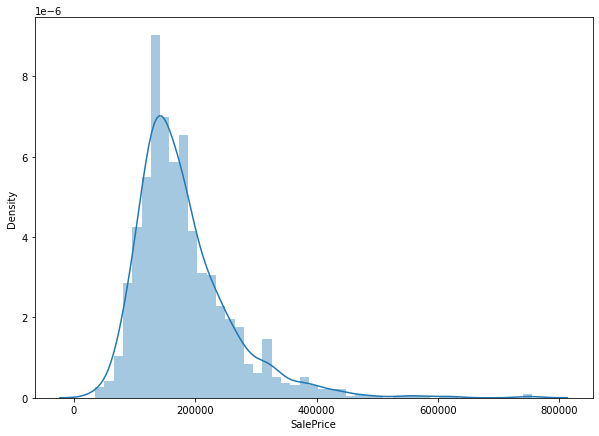

In [ ]:
# melihat distribusi dari variabel target (SalePrice)

plt.figure(figsize=(10,7))
sns.distplot(df['SalePrice'])

In [ ]:
# nilai dari skewness dan kurtosis pada distribusi SalePrice

print('Skewness : ', df['SalePrice'].skew())
print('Kurtosis : ', df['SalePrice'].kurt())

Skewness :  1.9631594151303469
Kurtosis :  6.985900533457255


 * skewness menunjukkan tingkat ketidakseimbangan dalam distribusi data
 * kurtosis menunjukkan kerataan atau puncak dari kurva distribusi frekuensi dan mengukur ekor atau outlier dari distribusi (+ lancip - landai)
 * If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
 * If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
 * If the skewness is less than -1 or greater than 1, the data are highly skewed


Skewness :  0.14803165512748662
Kurtosis :  6.985900533457255


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


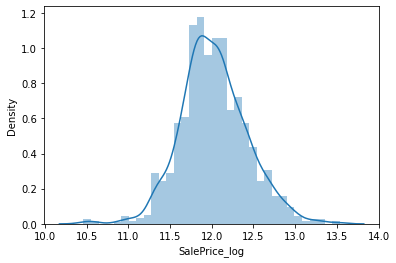

In [ ]:
# merubah variabel SalePrice menjadi distribusi normal
df['SalePrice_log'] = np.log(df['SalePrice'])

# menampilkan grafik distribusi
sns.distplot(df['SalePrice_log'])

# menampilkan nilai dari skewness dan kurtosis
print('Skewness : ', df['SalePrice_log'].skew())
print('Kurtosis : ', df['SalePrice'].kurt())

# menghapus variabel SalePrice (sekarang sudah menjadi SalePrice_log)
df.drop('SalePrice', axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

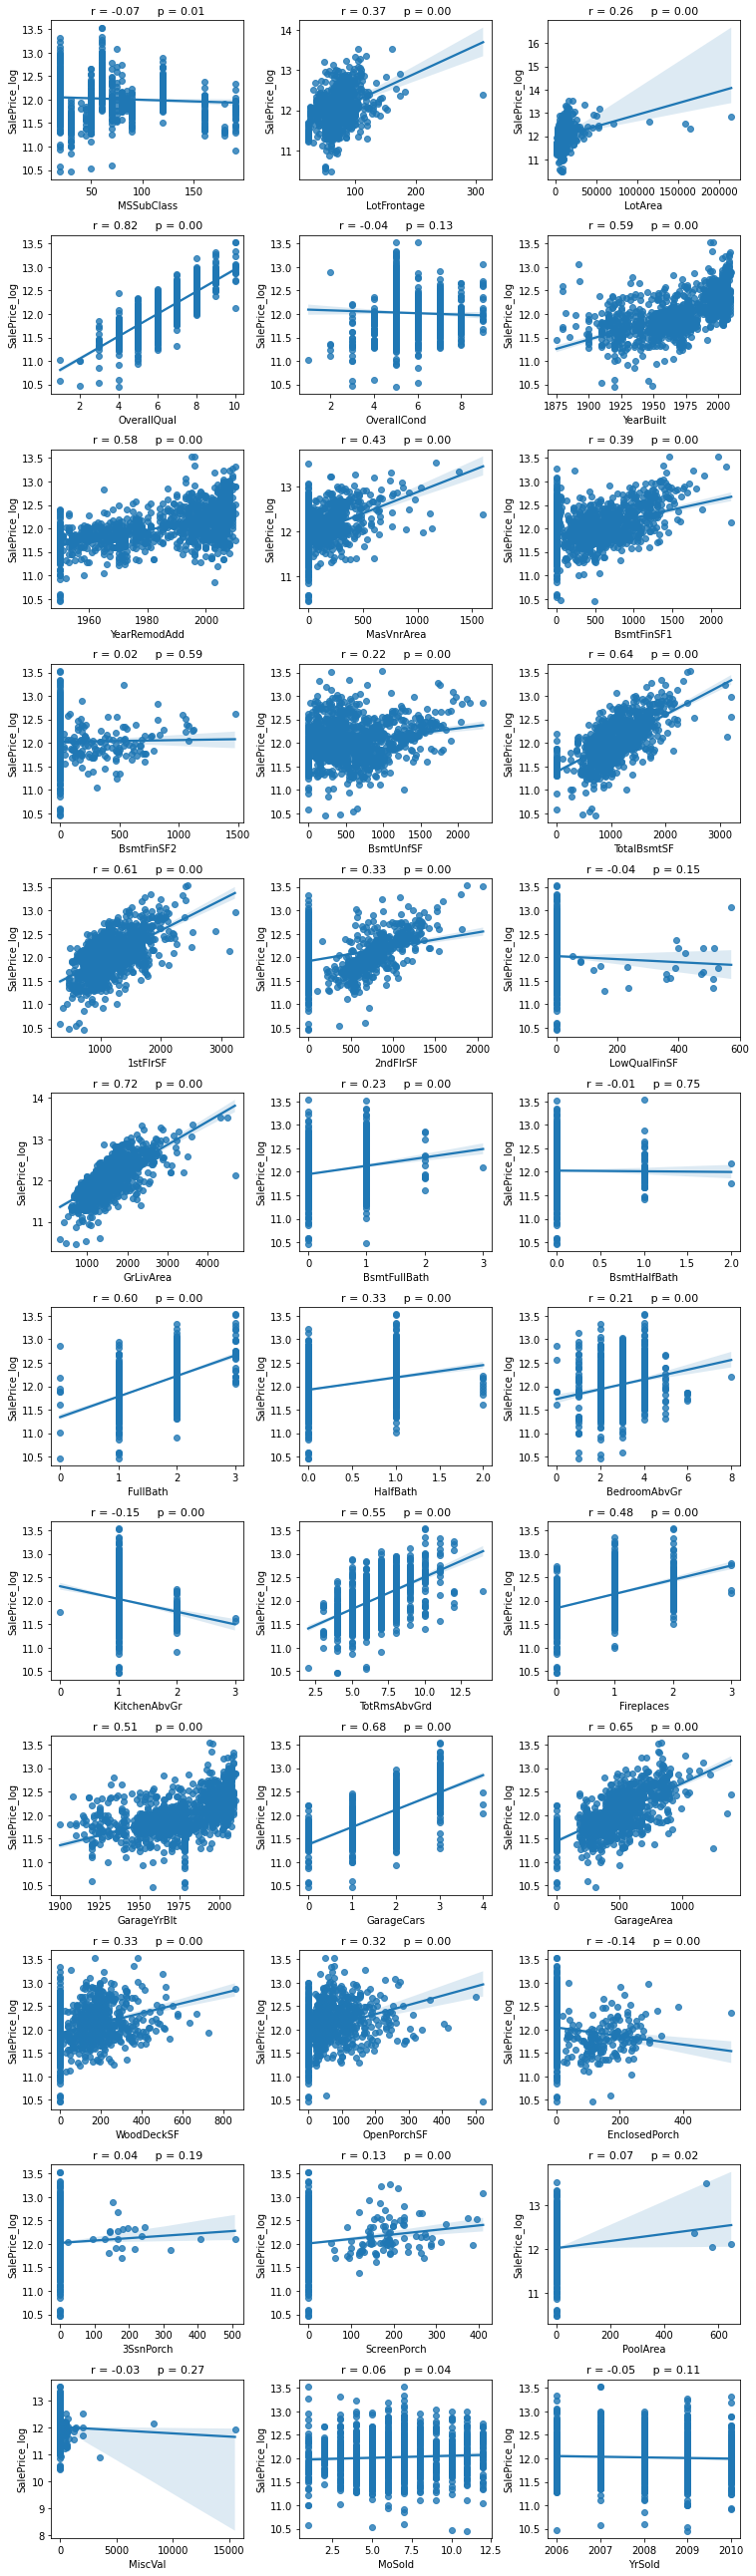

In [ ]:
# menggambarkan hubungan variabel numerikal terhadap variabel target, r menunjukkan nilai korelasi koeficient (-1 sampai 1)

nr_rows = 12
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical_feats)
li_not_plot = ['SalePrice_log']
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]

for r in range(0,nr_rows):
  for c in range(0,nr_cols):
    i = r*nr_cols+c
    if i < len(li_plot_num_feats):
      sns.regplot(df[li_plot_num_feats [i]], df['SalePrice_log'], ax = axs[r][c])
      stp = stats.pearsonr(df[li_plot_num_feats[i]], df['SalePrice_log'])
      #axs [r] [c].text(0.4,0.9,"title", fontsize=7)
      str_title = "r = " + "{0:.2f}".format(stp[0]) + "     " "p = " + "{0:.2f}".format(stp[1])
      axs[r][c].set_title(str_title, fontsize=11)
plt.tight_layout()
plt.show()


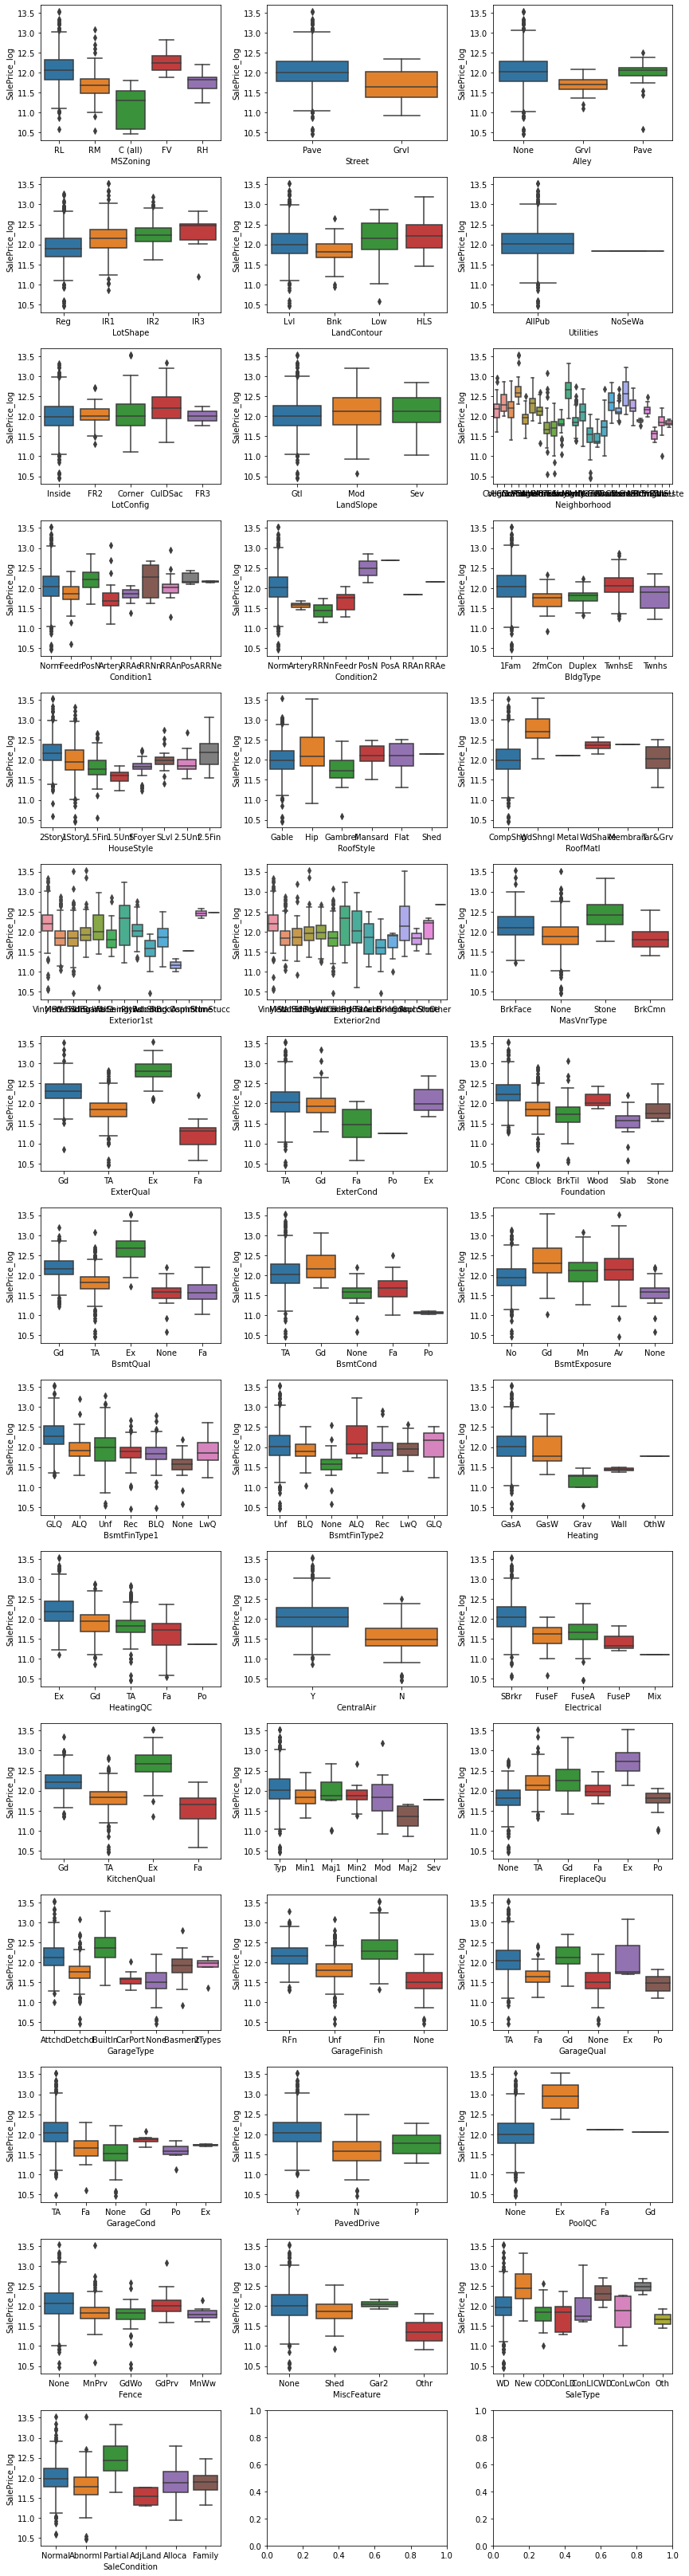

In [ ]:
# Menggambarkan hubungan variabel kategorikal dengan target (SalePrice_Log)

li_cat_feats = list(categorical_feats)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0, nr_rows):
  for c in range(0,nr_cols):
    i = r*nr_cols+c
    if i < len(li_cat_feats):
      sns.boxplot(x=li_cat_feats[i], y=df['SalePrice_log'], data=df, ax = axs[r][c])
plt.tight_layout()
plt.show()

In [ ]:
# merubah kategorical feats menjadi numerikal menggunakan OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

ct = OneHotEncoder()
Xct = pd.DataFrame(ct.fit_transform(df[categorical_feats]).toarray(),
                   columns=ct.get_feature_names_out())

df = pd.concat([df, Xct], axis=1)
df.drop(columns=categorical_feats, inplace=True)

In [ ]:
df.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# memisahkan variabel dependen dan independen

X = df.drop(columns=['SalePrice_log'], axis=1)
y = df['SalePrice_log']

In [ ]:
# membagi menjadi train dan test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [ ]:
print('jumlah X_train : ', len(X_train))
print('jumlah X_test : ', len(X_test))

jumlah X_train :  1007
jumlah X_test :  252


In [ ]:
# membuat model linear regression

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
model_linreg = linreg.fit(X_train, y_train)

In [ ]:
# evaluasi menggunakan MSE dan RMSE

from sklearn.metrics import mean_squared_error

# prediksi dengan X_train
train_predicted = model_linreg.predict(X_train)

print('Hasil MSE dari linreg data training : ', mean_squared_error(y_train, train_predicted))
print('hasil RMSE dari linreg data training : ', math.sqrt(mean_squared_error(y_train, train_predicted)))

Hasil MSE dari linreg data training :  0.00784965973897697
hasil RMSE dari linreg data training :  0.088598305508497


In [ ]:
# prediksi dengan X_test
test_predicted = model_linreg.predict(X_test)

print('Hasil MSE dari linreg data testing : ', mean_squared_error(y_test, test_predicted))
print('hasil RMSE dari linreg data testing : ', math.sqrt(mean_squared_error(y_test, test_predicted)))

Hasil MSE dari linreg data testing :  0.022707185702955917
hasil RMSE dari linreg data testing :  0.1506890364391382


In [ ]:
# evaluasi menggunakan r2_score

from sklearn.metrics import r2_score

print('hasil evaluasi menggunakan r2_score : ', r2_score(y_test, test_predicted))

hasil evaluasi menggunakan r2_score :  0.8781787147798562


Hasil dari pemodelan menggunakan linear regression sudah cukup bagus dengan hasil evaluasi menggunakan MSE dan RMSE hampir mendekati 0 untuk train dan testnya, dan juga evaluasi menggunakan r2_score menunjukkan hasil 0.8.\
Dari hasil tersebut sudah cukup bagus namun masih dapat dimaksimalkan hasil pemodelannya untuk mendekati hasil yang sempurna.